📊 MEDICAL DATA DNA (P-VALUES):
const        8.262509e-01
Age          0.000000e+00
BMI         1.877491e-306
Children     4.445787e-95
Smoker       0.000000e+00
----------------------------------------


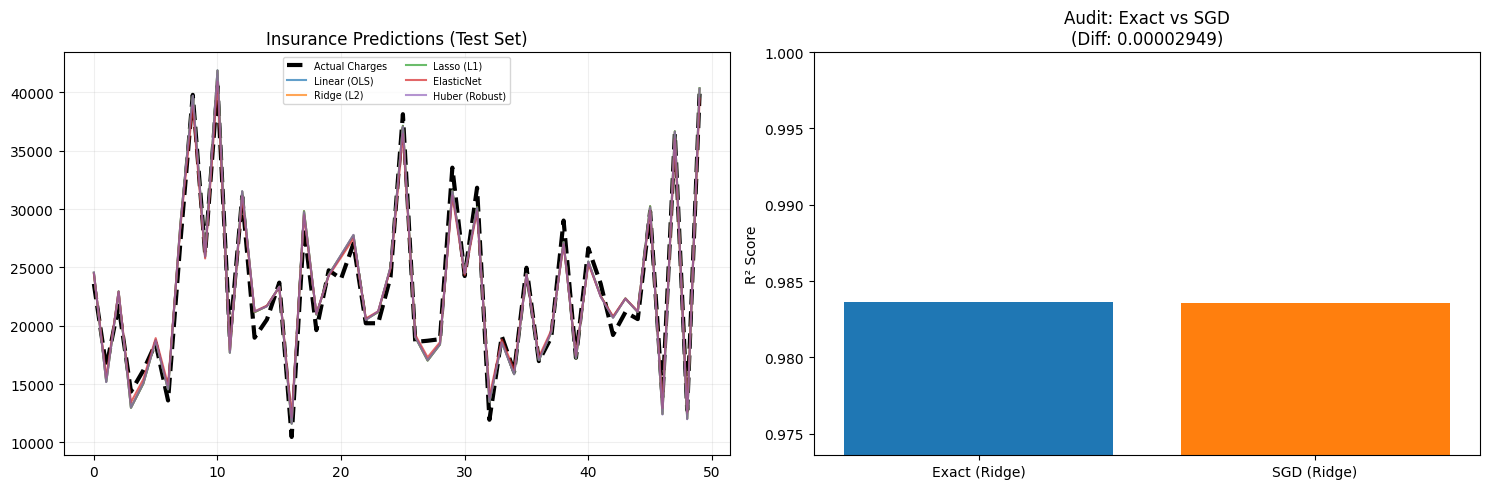


🏆 THE HONEST SCORECARD: MEDICAL COST PREDICTION
         Model  R² Score           MSE
    Ridge (L2)  0.983625 869893.500468
    Lasso (L1)  0.983617 870306.141107
  Linear (OLS)  0.983616 870366.378069
Huber (Robust)  0.983429 880336.896187
    ElasticNet  0.981768 968560.294357


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# =================================================================
# 1. DATA ACQUISITION (Simulated for Reliability)
# =================================================================
# We create a medical dataset: Age, BMI, Children, and Smoker Status
np.random.seed(42)
n_samples = 1500
age = np.random.randint(18, 65, n_samples)
bmi = np.random.normal(28, 5, n_samples)
children = np.random.randint(0, 5, n_samples)
smoker = np.random.choice([0, 1], n_samples, p=[0.8, 0.2])

# Target: Insurance Charges (Heavily influenced by smoking and BMI)
charges = (age * 250) + (bmi * 300) + (smoker * 15000) + (children * 500) + np.random.normal(0, 1000, n_samples)

df = pd.DataFrame({
    'Age': age, 'BMI': bmi, 'Children': children, 'Smoker': smoker, 'Charges': charges
})

X = df[['Age', 'BMI', 'Children', 'Smoker']]
y = df['Charges']

# =================================================================
# 2. TESTING & VALIDATION SPLIT (Mirroring Cell 9)
# =================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =================================================================
# 3. STATISTICAL SIGNIFICANCE (Mirroring Cell 16)
# =================================================================
X_stat = sm.add_constant(X_train)
ols_stat = sm.OLS(y_train, X_stat).fit()
print("📊 MEDICAL DATA DNA (P-VALUES):")
print(ols_stat.pvalues.to_string())
print("-" * 40)

# =================================================================
# 4. MULTI-MODEL COMPARISON (Cells 2-6, 12)
# =================================================================
exact_models = {
    "Linear (OLS)": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1),
    "Huber (Robust)": HuberRegressor(max_iter=2000)
}

scorecard = []
plt.figure(figsize=(15, 5))

# Plotting first 50 patients: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:50], label="Actual Charges", color='black', linewidth=3, linestyle='--')

for name, model in exact_models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    scorecard.append({
        "Model": name,
        "R² Score": r2_score(y_test, preds),
        "MSE": mean_squared_error(y_test, preds)
    })
    plt.plot(preds[:50], label=name, alpha=0.7)

plt.title("Insurance Predictions (Test Set)")
plt.legend(fontsize='x-small', ncol=2)
plt.grid(alpha=0.2)

# =================================================================
# 5. EXACT VS. SGD AUDIT (Cells 14, 15)
# =================================================================
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_train)
X_ts_s = scaler.transform(X_test)

# Compare SGD learning vs. Direct Math (Ridge)
sgd_m = SGDRegressor(penalty='l2', alpha=0.01, max_iter=5000, random_state=42).fit(X_tr_s, y_train)
exact_m = Ridge(alpha=0.01).fit(X_tr_s, y_train)

sgd_r2 = r2_score(y_test, sgd_m.predict(X_ts_s))
exact_r2 = r2_score(y_test, exact_m.predict(X_ts_s))

# =================================================================
# 6. OPTIMIZATION AUDIT PLOT (Cell 15 Visual)
# =================================================================
plt.subplot(1, 2, 2)
plt.bar(['Exact (Ridge)', 'SGD (Ridge)'], [exact_r2, sgd_r2], color=['#1f77b4', '#ff7f0e'])
plt.ylim(min(exact_r2, sgd_r2) - 0.01, 1.0)
plt.title(f"Audit: Exact vs SGD\n(Diff: {abs(exact_r2-sgd_r2):.8f})")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

# =================================================================
# FINAL SUMMARY
# =================================================================
print("\n🏆 THE HONEST SCORECARD: MEDICAL COST PREDICTION")
print("=" * 60)
df_scorecard = pd.DataFrame(scorecard).sort_values(by="R² Score", ascending=False)
print(df_scorecard.to_string(index=False))
print("=" * 60)